In [2]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Locate Data Files

emissions_sector_path = "Resources/emissions-by-source/data.csv"

emissions_user_path= "Resources/by-end-user/data.csv"


In [4]:
# Read Data

emissions_by_source = pd.read_csv(emissions_sector_path)
emissions_by_users = pd.read_csv(emissions_user_path)

In [5]:
# Emissions by Source 

emissions_by_source.head(200)

,National Communication Sector,National Communication Fuel,IPCC Code,National Communication Fuel Group,National Communication Category,National Communication Sub Sector,Source,Greenhouse Gas Group,Greenhouse Gas,Measure type,Activity Name,Year,Gas Emissions,Unit of Measure
0,Agriculture,Other emissions,3B24,Other emissions,Horses - wastes,Wastes,Domestic Horses - Direct,Nitrous oxide (N2O),Nitrous oxide (N2O),Gas Emissions,Housing,1993,0.03815,http://gss-data.org.uk/def/concept/measurement...
1,Agriculture,Other emissions,3B14,Other emissions,Poultry,Wastes,Digestate,Methane (CH4),Methane (CH4),Gas Emissions,Poultry other,1995,0.00000,http://gss-data.org.uk/def/concept/measurement...
2,Agriculture,Other emissions,3B14,Other emissions,Horses - wastes,Wastes,Managed Manure,Methane (CH4),Methane (CH4),Gas Emissions,Domestic horses,1999,0.00661,http://gss-data.org.uk/def/concept/measurement...
3,Agriculture,Other emissions,3D14,Other emissions,Direct soil emission,Other Agriculture,Arable - Direct,Nitrous oxide (N2O),Nitrous oxide (N2O),Gas Emissions,Urea ammonium nitrate residue,2001,0.04377,http://gss-data.org.uk/def/concept/measurement...
4,Energy Supply,Natural gas,1A1ciii,Gaseous fuels,Manufacture of solid fuels and other energy in...,Not Applicable,Nuclear fuel production,Methane (CH4),Methane (CH4),Gas Emissions,Natural gas,1996,0.00007,http://gss-data.org.uk/def/concept/measurement...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Agriculture,Other emissions,3D11,Other emissions,Direct soil emission,Other Agriculture,Grass - Direct,Nitrous oxide (N2O),Nitrous oxide (N2O),Gas Emissions,Calcium ammonium nitrate application,2003,0.12751,http://gss-data.org.uk/def/concept/measurement...
196,Transport,Fuel oil,1A4ciii,Petroleum,Fishing vessels,Shipping,Fishing vessels,Carbon dioxide (CO2),Carbon dioxide (CO2),Gas Emissions,Fuel oil,1992,0.10143,http://gss-data.org.uk/def/concept/measurement...
197,Agriculture,Other emissions,3B11b,Other emissions,Cattle - wastes,Wastes,Excreta,Methane (CH4),Methane (CH4),Gas Emissions,Other cattle cereal fed bull,1991,0.00030,http://gss-data.org.uk/def/concept/measurement...
198,Land Use and Land Use Change and Forestry,Other emissions,4E2,Other emissions,Land converted to settlements,Settlements,Forest Land converted to Settlements - Carbon ...,Carbon dioxide (CO2),Carbon dioxide (CO2),Gas Emissions,Non fuel combustion,2003,0.13245,http://gss-data.org.uk/def/concept/measurement...


In [53]:
new_emissions_by_source = emissions_by_source.drop(columns=['IPCC Code', 'Measure type', 'Unit of Measure', 'National Communication Fuel', 'Greenhouse Gas'])
new_emissions_by_source.head()

,National Communication Sector,National Communication Fuel Group,National Communication Category,National Communication Sub Sector,Source,Greenhouse Gas Group,Activity Name,Year,Gas Emissions
0,Agriculture,Other emissions,Horses - wastes,Wastes,Domestic Horses - Direct,Nitrous oxide (N2O),Housing,1993,0.03815
1,Agriculture,Other emissions,Poultry,Wastes,Digestate,Methane (CH4),Poultry other,1995,0.00000
2,Agriculture,Other emissions,Horses - wastes,Wastes,Managed Manure,Methane (CH4),Domestic horses,1999,0.00661
3,Agriculture,Other emissions,Direct soil emission,Other Agriculture,Arable - Direct,Nitrous oxide (N2O),Urea ammonium nitrate residue,2001,0.04377
4,Energy Supply,Gaseous fuels,Manufacture of solid fuels and other energy in...,Not Applicable,Nuclear fuel production,Methane (CH4),Natural gas,1996,0.00007


# (I) Greeenhouse gases emissions analysis by Source

In [54]:
new_emissions_by_source["National Communication Sector"].unique()

array(['Agriculture', 'Energy Supply',
       'Land Use and Land Use Change and Forestry', 'Transport',
       'Business', 'Residential', 'Industrial Processes',
       'Waste Management', 'Public'], dtype=object)

In [55]:
Source_count = new_emissions_by_source["National Communication Sector"].value_counts()
Source_count

Agriculture                                  16600
Business                                     13299
Transport                                     4610
Energy Supply                                 4379
Land Use and Land Use Change and Forestry     1863
Industrial Processes                          1579
Residential                                   1497
Waste Management                               585
Public                                         426
Name: National Communication Sector, dtype: int64

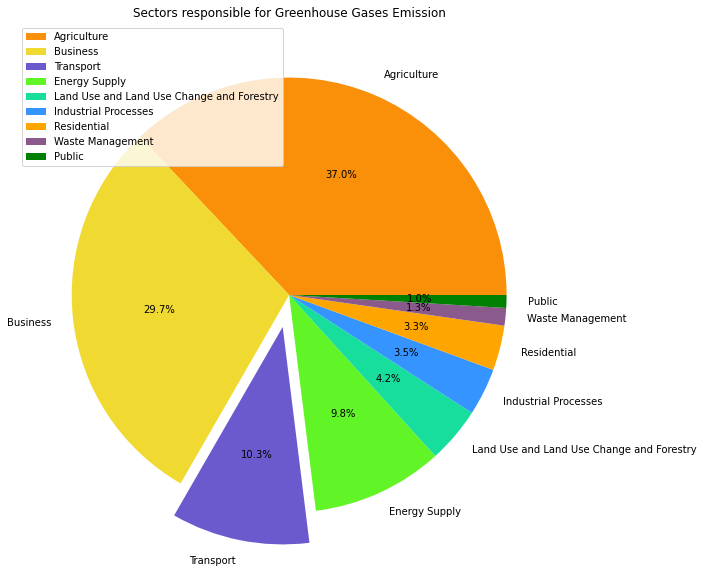

<Figure size 432x288 with 0 Axes>

In [302]:
label= Source_count.index
count= Source_count.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g']
explode = (0, 0, 0.15, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 2)
plt.title('Sectors responsible for Greenhouse Gases Emission')
plt.show()
plt.savefig('../Project-1/Analysis images/Sectors responsible for Greenhouse Gases Emission.png', dpi = 300, bbox_inches='tight')

#Unlike the popuplar opinion that transport is a major player
#this analysis proves that this sector consitutes only 10% of the total while
#87% of the emmision is contributed by the top 4 sectors.

# Source of greeenhouse gases emissions analysis by top activities (top 4)

In [85]:
new_emissions_by_source["Activity Name"].unique()

array(['Housing', 'Poultry other', 'Domestic horses',
       'Urea ammonium nitrate residue', 'Natural gas',
       'Mineralisation indirect leach', 'Non fuel combustion', 'Yarding',
       'Storage', 'Gas oil', 'Petrol',
       'Halocarbon used for manufacturing hfc 32', 'Coke oven gas',
       'Halocarbon bank hfc 125', 'Other cattle cereal fed bull',
       'Other cattle dairy in calf heifers', 'Derv', 'Poultry broilers',
       'Grazing', 'Halocarbon in products at disposal hfc 143a',
       'Clinical waste', 'Coal', 'Spreading', 'Ssf produced',
       'Halocarbon bank hfc 134a', 'Biomass', 'Waste solvent',
       'Other cattle cows', 'Oats residue', 'Halocarbon bank hfc 227ea',
       'Coke', 'Glass making additives', 'Halocarbon bank hfc 32',
       'Naphtha', 'Calcium ammonium nitrate application',
       'Petroleum coke', 'Halocarbon used for manufacturing hfc 134a',
       'Dolomite', 'Fuel oil', 'Ssf', 'Anthracite', 'Other cattle steers',
       'Chemical waste', 'Ammonium ni

In [112]:
activtity_df = new_emissions_by_source["Activity Name"]

In [113]:
Source_activity_count = activtity_df.value_counts()
Source_activity_count

Spreading                                        4398
Non fuel combustion                              2537
Grazing                                          2508
Storage                                          2266
Gas oil                                          2223
                                                 ... 
Halocarbon in products at disposal hfc 365mfc       8
Barley residue                                      6
Wheat residue                                       6
Oats residue                                        6
Bio mtbe                                            5
Name: Activity Name, Length: 168, dtype: int64

In [167]:
# Group activity together based on source of emission.

Agriculture_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Agriculture", :]
Business_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Business", :]
Transport_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Transport", :]
Energy_supply_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Energy Supply", :]

In [168]:
agriculture_activity_count = Agriculture_df["Activity Name"].value_counts()
agriculture_activity_count

Spreading          4398
Grazing            2508
Storage            2266
Housing            1590
Yarding             300
                   ... 
Mineralisation       30
Linseed residue       8
Wheat residue         6
Barley residue        6
Oats residue          6
Name: Activity Name, Length: 64, dtype: int64

In [137]:
Top_agri_activities = agriculture_activity_count.nlargest(n=10)
Top_agri_activities

Spreading                                                 4398
Grazing                                                   2508
Storage                                                   2266
Housing                                                   1590
Yarding                                                    300
Urea application                                           270
Ammonium sulphate and diammonium phosphate application     240
Ammonium nitrate application                               240
Calcium ammonium nitrate application                       240
Other nitrogen including compounds application             240
Name: Activity Name, dtype: int64

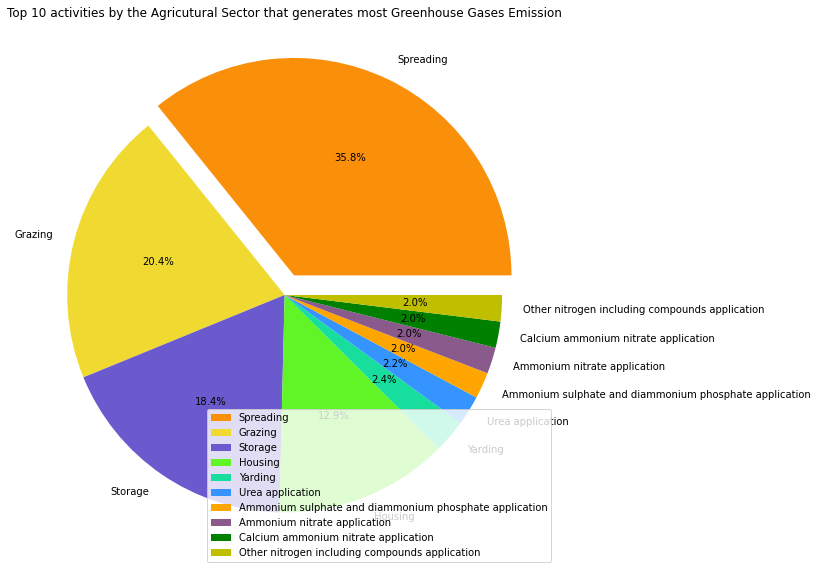

In [193]:
label= Top_agri_activities.index
count= Top_agri_activities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 4)
plt.title('Top 10 activities by the Agricutural Sector that generates most Greenhouse Gases Emission')
plt.show()

In [184]:
Business_activity_count = Business_df["Activity Name"].value_counts()
Business_activity_count

Natural gas                                      1194
Coal                                              978
Halocarbon bank hfc 134a                          936
Gas oil                                           810
Halocarbon used for manufacturing hfc 134a        807
Halocarbon bank hfc 125                           757
Halocarbon used for manufacturing hfc 125         704
Fuel oil                                          678
Halocarbon in products at disposal hfc 134a       478
Halocarbon bank hfc 32                            457
Halocarbon in products at disposal hfc 125        439
Halocarbon used for manufacturing hfc 32          426
Halocarbon bank hfc 143a                          396
Non fuel combustion                               359
Halocarbon used for manufacturing hfc 143a        333
Coke oven gas                                     270
Halocarbon bank hfc 152a                          248
Halocarbon in products at disposal hfc 143a       231
Lpg                         

In [143]:
Top_busi_activities = Business_activity_count.nlargest(n=10)
Top_busi_activities

Natural gas                                    1194
Coal                                            978
Halocarbon bank hfc 134a                        936
Gas oil                                         810
Halocarbon used for manufacturing hfc 134a      807
Halocarbon bank hfc 125                         757
Halocarbon used for manufacturing hfc 125       704
Fuel oil                                        678
Halocarbon in products at disposal hfc 134a     478
Halocarbon bank hfc 32                          457
Name: Activity Name, dtype: int64

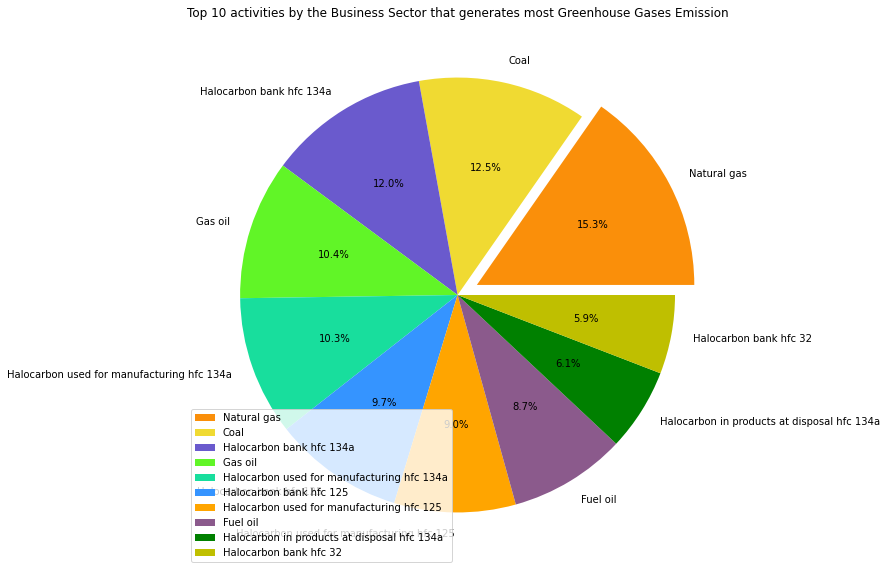

In [192]:
label= Top_busi_activities.index
count= Top_busi_activities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 3)
plt.title('Top 10 activities by the Business Sector that generates most Greenhouse Gases Emission')
plt.show()

In [182]:
transport_activity_count = Transport_df["Activity Name"].value_counts()
transport_activity_count

Derv                     1558
Petrol                   1230
Gas oil                   810
Aviation turbine fuel     240
Fuel oil                  201
Aviation spirit           192
Natural gas                90
Lubricants                 90
Lpg                        72
Burning oil                45
Coal                       45
Biodiesel                  18
Urea consumption           14
Bio mtbe                    5
Name: Activity Name, dtype: int64

In [152]:
Top_transport_activities = transport_activity_count.nlargest(n=10)
Top_transport_activities

Derv                     1558
Petrol                   1230
Gas oil                   810
Aviation turbine fuel     240
Fuel oil                  201
Aviation spirit           192
Natural gas                90
Lubricants                 90
Lpg                        72
Burning oil                45
Name: Activity Name, dtype: int64

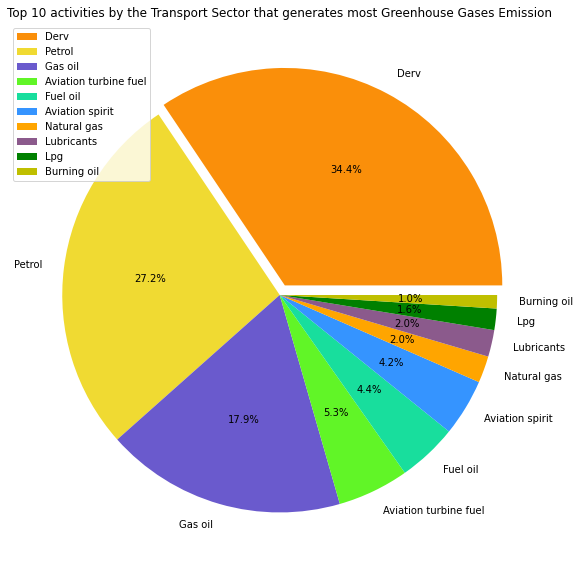

In [191]:
label= Top_transport_activities.index
count= Top_transport_activities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title('Top 10 activities by the Transport Sector that generates most Greenhouse Gases Emission')
plt.legend(loc = 2)
plt.show()
#DERV is diesel engine road vehicle#

In [171]:
Energy_activity_count = Energy_supply_df["Activity Name"].value_counts()
Energy_activity_count

Natural gas                                  585
Non fuel combustion                          510
Gas oil                                      333
Lpg                                          216
Coal                                         195
Exploration drilling amount of gas flared    180
Opg                                          180
Msw                                          180
Coke oven gas                                180
Fuel oil                                     180
Petroleum coke                               134
Sewage gas                                   120
Landfill gas                                 120
Colliery methane                             102
Blast furnace gas                             90
Naphtha                                       90
Waste oils                                    81
Burning oil                                   69
Natural gas leakage at point of use           60
Coal produced                                 60
Natural gas transmis

In [173]:
Top_Energy_activities = Energy_activity_count.nlargest(n=10)
Top_Energy_activities

Natural gas                                  585
Non fuel combustion                          510
Gas oil                                      333
Lpg                                          216
Coal                                         195
Exploration drilling amount of gas flared    180
Opg                                          180
Msw                                          180
Coke oven gas                                180
Fuel oil                                     180
Name: Activity Name, dtype: int64

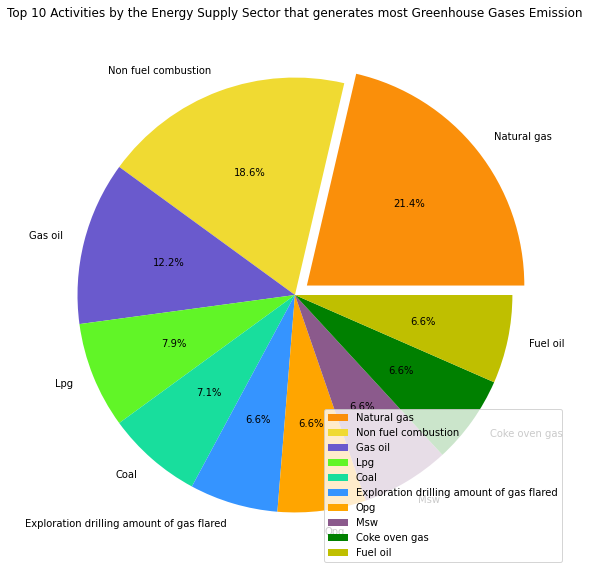

In [195]:
label= Top_Energy_activities.index
count= Top_Energy_activities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.07, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title('Top 10 Activities by the Energy Supply Sector that generates most Greenhouse Gases Emission')
plt.legend(loc = 4)
plt.show()

# Source of GG emission by Fuel_type 

In [202]:
new_emissions_by_source["National Communication Fuel Group"].unique()

array(['Other emissions', 'Gaseous fuels', 'Petroleum', 'Coal',
       'Other solid fuels'], dtype=object)

In [211]:
Fuel_type_count = new_emissions_by_source["National Communication Fuel Group"].value_counts()
Fuel_type_count

Other emissions      29447
Petroleum             8115
Gaseous fuels         4362
Coal                  1554
Other solid fuels     1360
Name: National Communication Fuel Group, dtype: int64

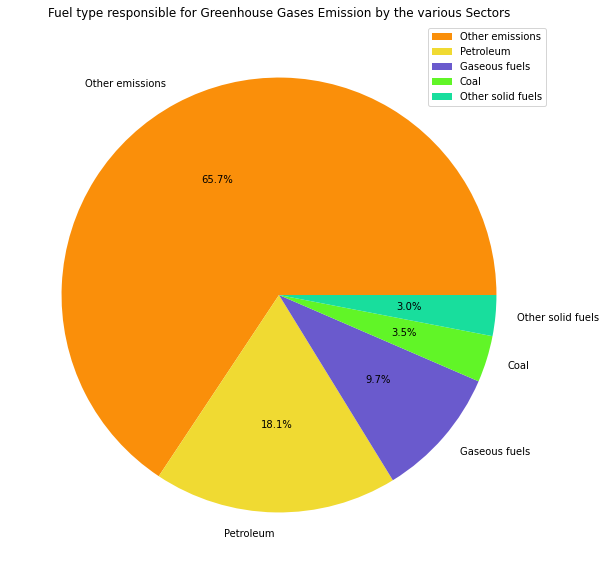

In [216]:
label= Fuel_type_count.index
count= Fuel_type_count.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
explode = (0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 1)
plt.title('Fuel type responsible for Greenhouse Gases Emission by the various Sectors')
plt.show()

# Source of GG emission by 'Greenhouse Gas Group'

In [217]:
new_emissions_by_source["Greenhouse Gas Group"].unique()

array(['Nitrous oxide (N2O)', 'Methane (CH4)', 'Carbon dioxide (CO2)',
       'Hydrofluorocarbons (HFCs)', 'Sulphur hexafluoride (SF6)',
       'Perfluorocarbons (PFCs)', 'Nitrogen Trifluoride (NF3)'],
      dtype=object)

In [219]:
G_gas_count = new_emissions_by_source["Greenhouse Gas Group"].value_counts()
G_gas_count

Nitrous oxide (N2O)           19800
Methane (CH4)                  9909
Carbon dioxide (CO2)           7415
Hydrofluorocarbons (HFCs)      7164
Perfluorocarbons (PFCs)         340
Sulphur hexafluoride (SF6)      180
Nitrogen Trifluoride (NF3)       30
Name: Greenhouse Gas Group, dtype: int64

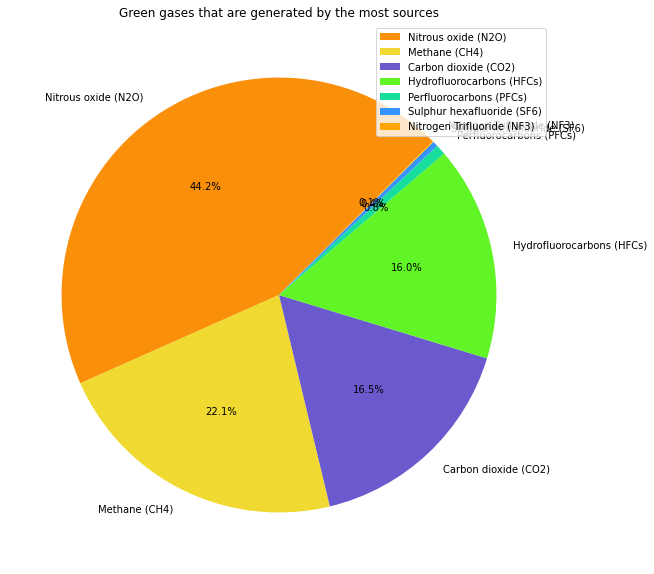

In [397]:
label= G_gas_count.index
count= G_gas_count.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange']
explode = (0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode, startangle=45)
plt.title('Green gases that are generated by the most sources')
plt.legend(loc = 1)
plt.show()

# Source of GG emission and time frame
whether activities have changed at source over the study period of this dataset'

In [230]:
year = new_emissions_by_source["Year"].unique()

array([1993, 1995, 1999, 2001, 1996, 1997, 1998, 2002, 1990, 1992, 2003,
       1994, 2000, 1991, 2004, 2011, 2014, 2012, 2005, 2010, 2016, 2008,
       2009, 2007, 2006, 2013, 2015, 2017, 2018, 2019])

In [231]:
GG_Year_count = new_emissions_by_source["Year"].value_counts()
GG_Year_count

2013    1616
2012    1614
2014    1611
2016    1610
2015    1608
2011    1600
2017    1593
2008    1588
2010    1587
2018    1583
2009    1579
2019    1579
2006    1564
2007    1559
2005    1544
2002    1509
2004    1509
2001    1508
2000    1508
2003    1507
1999    1497
1998    1496
1997    1442
1996    1421
1995    1344
1994    1297
1993    1273
1992    1264
1991    1264
1990    1164
Name: Year, dtype: int64

In [ ]:
# Group activity together based on source of emission (for reference).

Agriculture_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Agriculture", :]
Business_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Business", :]
Transport_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Transport", :]
Energy_supply_df = new_emissions_by_source.loc[new_emissions_by_source["National Communication Sector"]=="Energy Supply", :]

In [253]:
agriculture_year_count = Agriculture_df["Year"].value_counts()
business_year_count = Business_df["Year"].value_counts()
transport_year_count = Transport_df["Year"].value_counts()
energy_year_count = Energy_supply_df["Year"].value_counts()

Text(0, 0.5, 'Agricultural activities count')

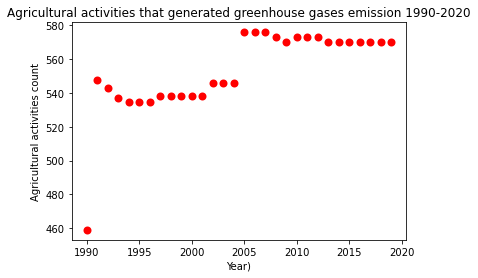

In [286]:
x_axis = agriculture_year_count.index
y_axis = agriculture_year_count.values
plt.title("Agricultural activities that generated greenhouse gases emission by sources -- 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Agricultural activities count")

Text(0, 0.5, 'Business activities count')

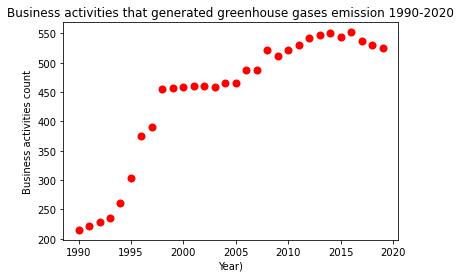

In [285]:
x_axis = business_year_count.index
y_axis = business_year_count.values
plt.title("Business activities that generated greenhouse gases emission 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Business activities count")

Text(0, 0.5, 'Transport activities count')

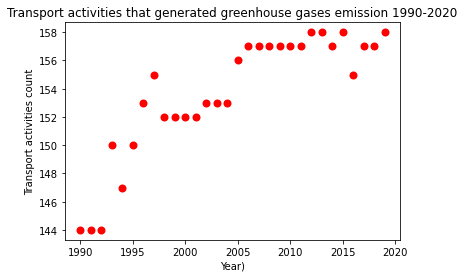

In [282]:
x_axis = transport_year_count.index
y_axis = transport_year_count.values
plt.title("Transport activities that generated greenhouse gases emission 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Transport activities count")

Text(0, 0.5, 'Energy Sector activities count')

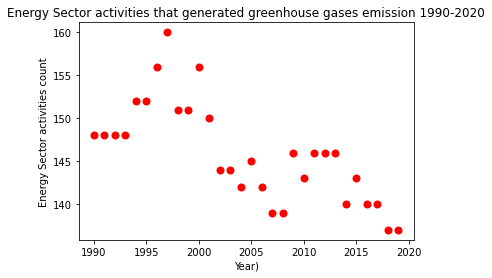

In [284]:
x_axis = energy_year_count.index
y_axis = energy_year_count.values
plt.title("Energy Sector activities that generated greenhouse gases emission 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Energy Sector activities count")

# (I) Greeenhouse gases emissions analysis by Users

In [194]:
# Emissions by user
emissions_by_users.head()

,National Communication Category,National Communication Fuel,Measure type,Greenhouse Gas Group,IPCC Code,Year,National Communication Sub Sector,Greenhouse Gas,Activity Name,National Communication Fuel Group,Source,National Communication Sector,Gas Emissions,Unit of Measure
0,Land converted to wetland,Other emissions,Gas Emissions,Carbon dioxide (CO2),4D2,2017,Wetlands,Carbon dioxide (CO2),Non fuel combustion,Other emissions,Forest Land converted to Other Wetlands - Carb...,Land Use and Land Use Change and Forestry,0.05315,http://gss-data.org.uk/def/concept/measurement...
1,Iron and steel production,Fuel oil,Gas Emissions,Methane (CH4),2C1b,2006,Not Applicable,Methane (CH4),Fuel oil,Petroleum,Blast furnaces,Industrial Processes,0.00274,http://gss-data.org.uk/def/concept/measurement...
2,Poultry,Other emissions,Gas Emissions,Methane (CH4),3B14,2005,Wastes,Methane (CH4),Poultry turkeys,Other emissions,Managed Manure,Agriculture,0.01017,http://gss-data.org.uk/def/concept/measurement...
3,Refrigeration and air conditioning,Other emissions,Gas Emissions,Hydrofluorocarbons (HFCs),2F1c,2005,Not Applicable,HFC-143a,Halocarbon used for manufacturing hfc 143a,Other emissions,Industrial Refrigeration: Industrial DX system...,Business,0.00172,http://gss-data.org.uk/def/concept/measurement...
4,Harvested wood,Other emissions,Gas Emissions,Carbon dioxide (CO2),4G,2001,Other LULUCF,Carbon dioxide (CO2),Non fuel combustion,Other emissions,HWP Produced and Exported - Carbon stock change,Land Use and Land Use Change and Forestry,-0.35230,http://gss-data.org.uk/def/concept/measurement...


In [318]:
new_emissions_by_users = emissions_by_users.drop(columns=['IPCC Code', 'Measure type', 'Unit of Measure', 'National Communication Fuel', 'Greenhouse Gas'])
new_emissions_by_users.head()


,National Communication Category,Greenhouse Gas Group,Year,National Communication Sub Sector,Activity Name,National Communication Fuel Group,Source,National Communication Sector,Gas Emissions
0,Land converted to wetland,Carbon dioxide (CO2),2017,Wetlands,Non fuel combustion,Other emissions,Forest Land converted to Other Wetlands - Carb...,Land Use and Land Use Change and Forestry,0.05315
1,Iron and steel production,Methane (CH4),2006,Not Applicable,Fuel oil,Petroleum,Blast furnaces,Industrial Processes,0.00274
2,Poultry,Methane (CH4),2005,Wastes,Poultry turkeys,Other emissions,Managed Manure,Agriculture,0.01017
3,Refrigeration and air conditioning,Hydrofluorocarbons (HFCs),2005,Not Applicable,Halocarbon used for manufacturing hfc 143a,Other emissions,Industrial Refrigeration: Industrial DX system...,Business,0.00172
4,Harvested wood,Carbon dioxide (CO2),2001,Other LULUCF,Non fuel combustion,Other emissions,HWP Produced and Exported - Carbon stock change,Land Use and Land Use Change and Forestry,-0.35230


In [325]:
new_emissions_by_users["National Communication Sector"].unique()

array(['Land Use and Land Use Change and Forestry',
       'Industrial Processes', 'Agriculture', 'Business', 'Transport',
       'Waste Management', 'Public', 'Residential'], dtype=object)

In [326]:
User_count = new_emissions_by_users["National Communication Sector"].value_counts()
User_count

Agriculture                                  16660
Business                                     13691
Transport                                     4904
Land Use and Land Use Change and Forestry     1863
Industrial Processes                          1822
Residential                                   1497
Waste Management                               585
Public                                         486
Name: National Communication Sector, dtype: int64

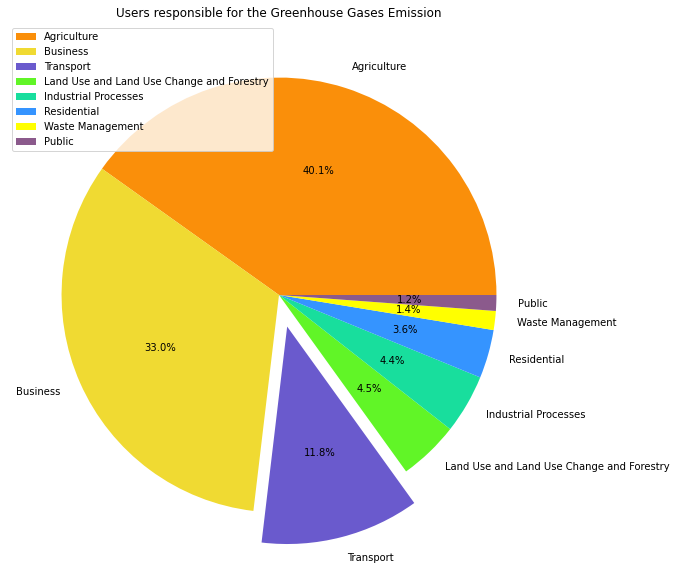

<Figure size 432x288 with 0 Axes>

In [327]:
label= User_count.index
count= User_count.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'yellow', '#8B5A8C']
explode = (0, 0, 0.15, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 2)
plt.title('Users responsible for the Greenhouse Gases Emission')
plt.show()
plt.savefig('../Project-1/Analysis images/Users responsible for Greenhouse Gases Emission.png', dpi = 300, bbox_inches='tight')

#Unlike the popuplar opinion that transport is a major player
#this analysis proves that this user 'Transport' consitutes only 11.8% of the total while
#85% of the emission is contributed by the top 4 users.

In [328]:
new_emissions_by_users["Activity Name"].unique()

array(['Non fuel combustion', 'Fuel oil', 'Poultry turkeys',
       'Halocarbon used for manufacturing hfc 143a',
       'Halocarbon bank hfc 134a', 'Pig gilt', 'Coal', 'Derv',
       'Lubricants', 'Petrol', 'Halocarbon bank hfc 125',
       'Other cattle dairy in calf heifers', 'Biological waste',
       'Sewage gas', 'Opg', 'Dolomite', 'Urea application',
       'Professional horses', 'Ssf',
       'Halocarbon in products at disposal hfc 143a',
       'Primary aluminium production', 'Gas oil', 'Ethylene oxide',
       'Blast furnace gas', 'Sheep lamb',
       'Halocarbon in products at disposal hfc 134a', 'Natural gas',
       'Aviation spirit', 'Other cattle cows',
       'Halocarbon used for manufacturing c4f10',
       'Halocarbon used for manufacturing hfc 134a',
       'Other cattle cereal fed bull', 'Coke', 'Aviation turbine fuel',
       'Halocarbon used for manufacturing hfc 125', 'Ethylene',
       'Poultry other', 'Other cattle dairy calves female', 'Sheep ewe',
       'Pig

In [335]:
activtity_user_df = new_emissions_by_users["Activity Name"]
activtity_user_df

0                               Non fuel combustion
1                                          Fuel oil
2                                   Poultry turkeys
3        Halocarbon used for manufacturing hfc 143a
4                               Non fuel combustion
                            ...                    
41503                                Clinical waste
41504                           Non fuel combustion
41505                                       Biomass
41506                            Halocarbon use sf6
41507                           Non fuel combustion
Name: Activity Name, Length: 41508, dtype: object

In [333]:
# Group activity together based on Users
Agriculture_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Agriculture", :]
Business_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Business", :]
Transport_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Transport", :]
Land_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Land Use and Land Use Change and Forestry", :]

In [336]:
agri_user_activity_count = Agriculture_user_df["Activity Name"].value_counts()
agri_user_activity_count

Spreading          4398
Grazing            2508
Storage            2266
Housing            1590
Yarding             300
                   ... 
Mineralisation       30
Linseed residue       8
Oats residue          6
Barley residue        6
Wheat residue         6
Name: Activity Name, Length: 64, dtype: int64

In [337]:
Top_agri_useractivities = agri_user_activity_count.nlargest(n=10)
Top_agri_useractivities

Spreading                                                 4398
Grazing                                                   2508
Storage                                                   2266
Housing                                                   1590
Yarding                                                    300
Urea application                                           270
Calcium ammonium nitrate application                       240
Other nitrogen including compounds application             240
Ammonium sulphate and diammonium phosphate application     240
Ammonium nitrate application                               240
Name: Activity Name, dtype: int64

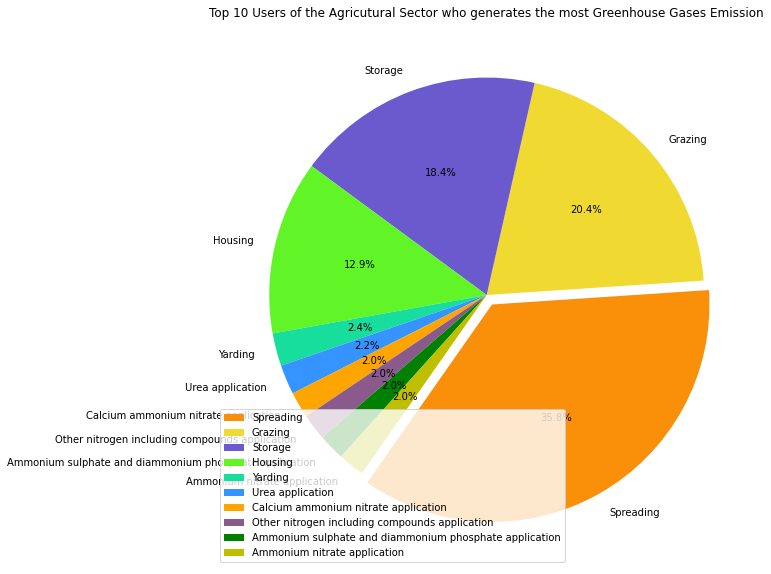

In [370]:
label= Top_agri_useractivities.index
count= Top_agri_useractivities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode, startangle=235)
plt.legend(loc = 3)
plt.title('Top 10 Users of the Agricutural Sector who generates the most Greenhouse Gases Emission')
plt.show()

In [372]:
Business_user_activity_count = Business_user_df["Activity Name"].value_counts()
Business_user_activity_count

Natural gas                                      1206
Coal                                             1068
Halocarbon bank hfc 134a                          936
Gas oil                                           810
Halocarbon used for manufacturing hfc 134a        807
Halocarbon bank hfc 125                           757
Halocarbon used for manufacturing hfc 125         704
Fuel oil                                          678
Halocarbon in products at disposal hfc 134a       478
Halocarbon bank hfc 32                            457
Halocarbon in products at disposal hfc 125        439
Halocarbon used for manufacturing hfc 32          426
Halocarbon bank hfc 143a                          396
Non fuel combustion                               359
Halocarbon used for manufacturing hfc 143a        333
Coke oven gas                                     270
Halocarbon bank hfc 152a                          248
Halocarbon in products at disposal hfc 143a       231
Petroleum coke              

In [373]:
Top_busi_useractivities = Business_user_activity_count.nlargest(n=10)
Top_busi_useractivities

Natural gas                                    1206
Coal                                           1068
Halocarbon bank hfc 134a                        936
Gas oil                                         810
Halocarbon used for manufacturing hfc 134a      807
Halocarbon bank hfc 125                         757
Halocarbon used for manufacturing hfc 125       704
Fuel oil                                        678
Halocarbon in products at disposal hfc 134a     478
Halocarbon bank hfc 32                          457
Name: Activity Name, dtype: int64

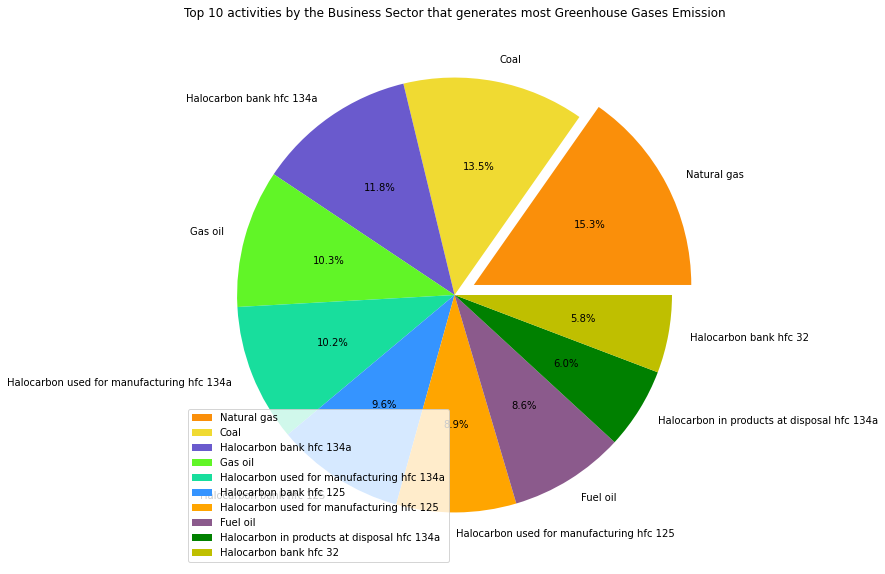

In [374]:
label= Top_busi_useractivities.index
count= Top_busi_useractivities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 3)
plt.title('Top 10 Users of the Business Sector who generates the most Greenhouse Gases Emission')
plt.show()

In [375]:
transport_user_activity_count = Transport_user_df["Activity Name"].value_counts()
transport_user_activity_count

Derv                     1576
Petrol                   1230
Gas oil                   810
Lubricants                270
Aviation turbine fuel     270
Aviation spirit           222
Fuel oil                  201
Natural gas                90
Lpg                        72
Biodiesel                  54
Coal                       45
Burning oil                45
Urea consumption           14
Bio mtbe                    5
Name: Activity Name, dtype: int64

In [376]:
Top_transport_useractivities = transport_user_activity_count.nlargest(n=10)
Top_transport_useractivities

Derv                     1576
Petrol                   1230
Gas oil                   810
Lubricants                270
Aviation turbine fuel     270
Aviation spirit           222
Fuel oil                  201
Natural gas                90
Lpg                        72
Biodiesel                  54
Name: Activity Name, dtype: int64

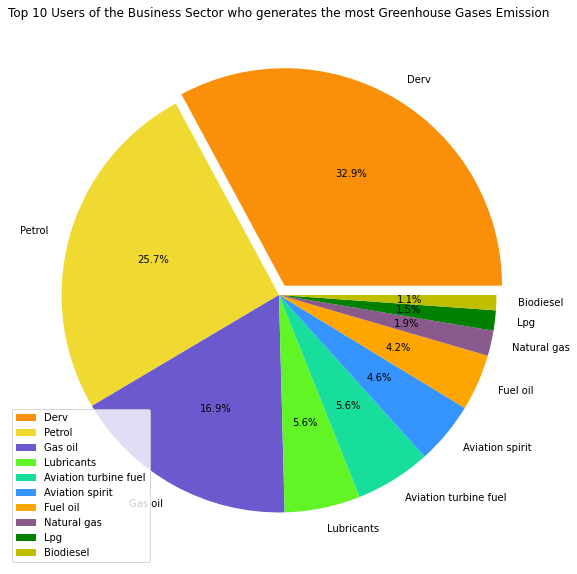

In [378]:
label= Top_transport_useractivities.index
count= Top_transport_useractivities.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g', 'y']
explode = (0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 3)
plt.title('Top 10 Users of the Business Sector who generates the most Greenhouse Gases Emission')
plt.show()

In [380]:
Land_useractivity_count = Land_user_df["Activity Name"].value_counts()
Land_useractivity_count

Non fuel combustion    1364
Biomass                 499
Name: Activity Name, dtype: int64

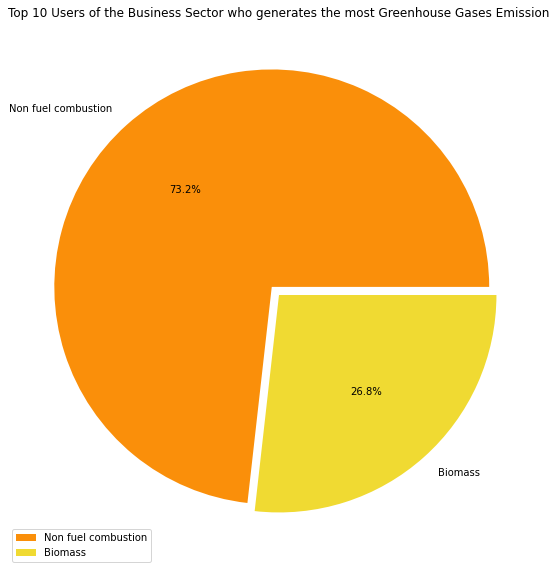

In [383]:
label= Land_useractivity_count.index
count= Land_useractivity_count.values
color = ['#FA8F0A','#F0DA32']
explode = (0.05, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 3)
plt.title('Top 10 Users of the Business Sector who generates the most Greenhouse Gases Emission')
plt.show()

# Users of Fuel_type that are responsible for GG emission 

In [384]:
new_emissions_by_users["National Communication Fuel Group"].unique()

array(['Other emissions', 'Petroleum', 'Coal', 'Gaseous fuels',
       'Other solid fuels'], dtype=object)

In [385]:
Fuel_type_user_count = new_emissions_by_users["National Communication Fuel Group"].value_counts()
Fuel_type_user_count

Other emissions      28069
Petroleum             7812
Gaseous fuels         2856
Coal                  1449
Other solid fuels     1322
Name: National Communication Fuel Group, dtype: int64

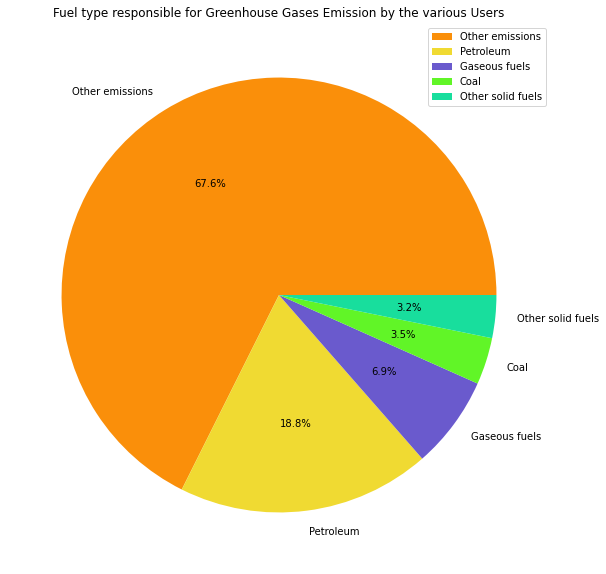

In [386]:
label= Fuel_type_user_count.index
count= Fuel_type_user_count.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
explode = (0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 1)
plt.title('Fuel type responsible for Greenhouse Gases Emission by the various Users')
plt.show()

# Source of GG emission by 'Greenhouse Gas Group'

In [388]:
new_emissions_by_users["Greenhouse Gas Group"].unique()

array(['Carbon dioxide (CO2)', 'Methane (CH4)',
       'Hydrofluorocarbons (HFCs)', 'Perfluorocarbons (PFCs)',
       'Nitrous oxide (N2O)', 'Nitrogen Trifluoride (NF3)',
       'Sulphur hexafluoride (SF6)'], dtype=object)

In [389]:
G_gas_count_byusers = new_emissions_by_users["Greenhouse Gas Group"].value_counts()
G_gas_count_byusers

Nitrous oxide (N2O)           18998
Methane (CH4)                  8594
Hydrofluorocarbons (HFCs)      7164
Carbon dioxide (CO2)           6202
Perfluorocarbons (PFCs)         340
Sulphur hexafluoride (SF6)      180
Nitrogen Trifluoride (NF3)       30
Name: Greenhouse Gas Group, dtype: int64

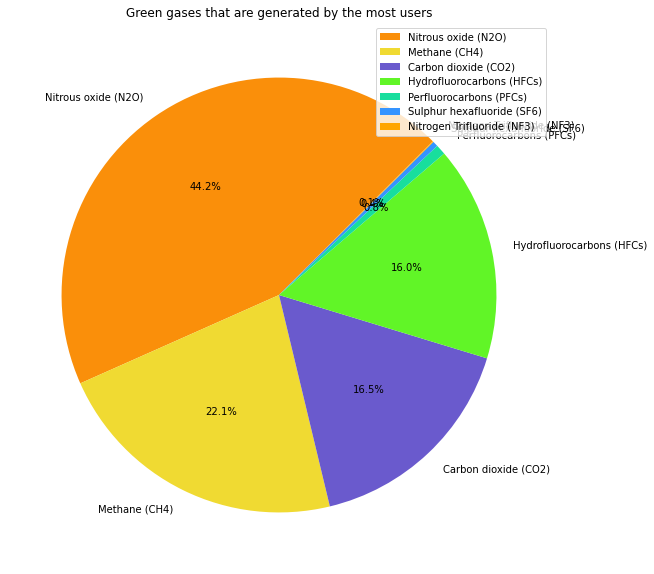

In [398]:
label= G_gas_count.index
count= G_gas_count.values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange']
explode = (0, 0, 0, 0, 0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode, startangle=45)
plt.title('Green gases that are generated by the most users')
plt.legend(loc = 1)
plt.show()

In [399]:
year = new_emissions_by_users["Year"].unique()

In [400]:
GG_Year_count = new_emissions_by_users["Year"].value_counts()
GG_Year_count

2014    1503
2013    1502
2012    1500
2016    1500
2015    1495
2011    1486
2008    1484
2017    1483
2010    1479
2018    1476
2019    1472
2009    1466
2006    1455
2007    1453
2005    1432
2004    1402
2002    1402
2003    1400
2001    1395
2000    1389
1998    1384
1999    1383
1997    1321
1996    1304
1995    1229
1994    1182
1993    1162
1992    1159
1991    1155
1990    1055
Name: Year, dtype: int64

In [401]:
# Group activity together based on Users
Agriculture_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Agriculture", :]
Business_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Business", :]
Transport_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Transport", :]
Land_user_df = new_emissions_by_users.loc[new_emissions_by_users["National Communication Sector"]=="Land Use and Land Use Change and Forestry", :]

In [403]:
agriculture_year_user_count = Agriculture_user_df["Year"].value_counts()
business_year_user_count = Business_user_df["Year"].value_counts()
transport_year_user_count = Transport_user_df["Year"].value_counts()
Land_year_user_count = Land_user_df["Year"].value_counts()

Text(0, 0.5, 'Agricultural activities count')

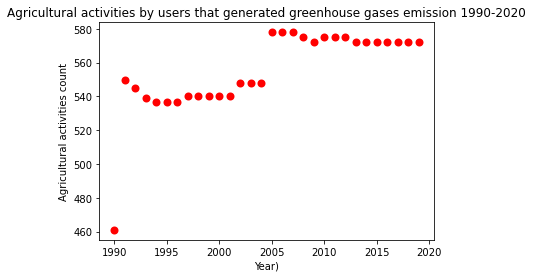

In [404]:
x_axis = agriculture_year_user_count.index
y_axis = agriculture_year_user_count.values
plt.title("Agricultural activities by users that generated greenhouse gases emission -- 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Agricultural activities count")

Text(0, 0.5, 'Business activities count')

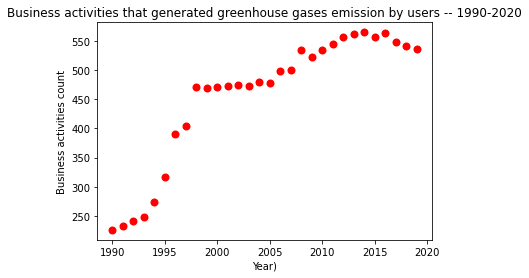

In [405]:
x_axis = business_year_user_count.index
y_axis = business_year_user_count.values
plt.title("Business activities that generated greenhouse gases emission by users -- 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Business activities count")

Text(0, 0.5, 'Transport activities count')

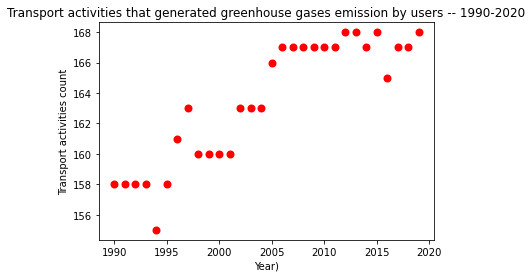

In [406]:
x_axis = transport_year_user_count.index
y_axis = transport_year_user_count.values
plt.title("Transport activities that generated greenhouse gases emission by users -- 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Transport activities count")

Text(0, 0.5, 'Energy Sector activities count')

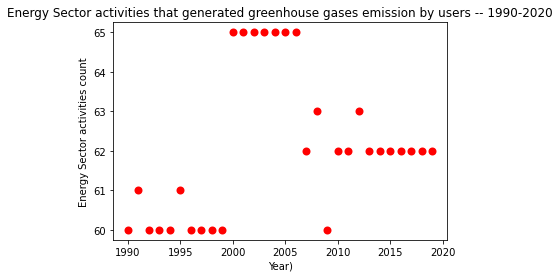

In [408]:
x_axis = Land_year_user_count.index
y_axis = Land_year_user_count.values
plt.title("Energy Sector activities that generated greenhouse gases emission by users -- 1990-2020")
plt.scatter(x_axis, y_axis,linewidth=2, marker="o", color="red")
plt.xlabel("Year)")
plt.ylabel("Energy Sector activities count")